In [1]:
import os
import json
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_auc_score, roc_curve
from catboost import CatBoostClassifier
from tqdm import tqdm_notebook as tqdm

from data_manager import DataManager
from utils import *

In [21]:
FEATURE_GENERATION = '7gen'
CITY = 'msk'

In [22]:
dm_filename = './{}/dm_{}.pickle'.format(FEATURE_GENERATION, CITY)
if not os.path.exists(dm_filename):
    dm = DataManager(city_name=CITY, n_stations=3)
    with open(dm_filename, 'wb') as f:
        pickle.dump(dm, f)
else:
    with open(dm_filename, 'rb') as f:
        dm = pickle.load(f)

X, y, block_ids = dm.X_train, dm.y_train, dm.train_block_ids
X_test, test_block_ids = dm.X_test, dm.test_block_ids

in_train = block_ids['hours_since'] <= np.percentile(block_ids['hours_since'], 85)  #leave last 15% for validation
X_train, y_train = X[in_train], y[in_train]
X_val, y_val = X[~in_train], y[~in_train]

X_train.shape, X_val.shape, y_train.shape, y_val.shape

Loading train df...
Loading train netatmo df...
Preprocessing train netatmo df...
Extracting features...


100%|██████████| 45617/45617 [26:44<00:00, 28.44it/s]  


Loading test df...
Loading test netatmo df
Extracting features...


100%|██████████| 14331/14331 [06:42<00:00, 35.63it/s]


Postprocessing nans...


((38810, 260), (6807, 260), (38810,), (6807,))

In [23]:
model = CatBoostClassifier(random_seed=1,
                           thread_count=8,
                           eval_metric='AUC',
                           verbose=True) \
            .fit(X_train, y_train, eval_set=(X_val, y_val))

Borders for float features generated
0:	learn 0.6043178947	test 0.4107698319	bestTest 0.4107698319		total: 82.1ms	remaining: 41s
1:	learn 0.6390759623	test 0.3929192496	bestTest 0.4107698319		total: 155ms	remaining: 38.7s
2:	learn 0.646503515	test 0.4208856478	bestTest 0.4208856478		total: 235ms	remaining: 39s
3:	learn 0.6527098931	test 0.4046253477	bestTest 0.4208856478		total: 322ms	remaining: 39.9s
4:	learn 0.6567234576	test 0.4456825617	bestTest 0.4456825617		total: 410ms	remaining: 40.6s
5:	learn 0.6537709492	test 0.4774613801	bestTest 0.4774613801		total: 492ms	remaining: 40.5s
6:	learn 0.6558622947	test 0.4774473842	bestTest 0.4774613801		total: 571ms	remaining: 40.2s
7:	learn 0.6568324263	test 0.4685346311	bestTest 0.4774613801		total: 654ms	remaining: 40.2s
8:	learn 0.6582052164	test 0.4636311152	bestTest 0.4774613801		total: 748ms	remaining: 40.8s
9:	learn 0.6649521471	test 0.4432455286	bestTest 0.4774613801		total: 830ms	remaining: 40.7s
10:	learn 0.6653411624	test 0.4450577

90:	learn 0.7601764568	test 0.6765003295	bestTest 0.6776439097		total: 7.68s	remaining: 34.5s
91:	learn 0.7606501615	test 0.6774882056	bestTest 0.6776439097		total: 7.76s	remaining: 34.4s
92:	learn 0.7615923453	test 0.683307577	bestTest 0.683307577		total: 7.85s	remaining: 34.3s
93:	learn 0.7622929738	test 0.6883023577	bestTest 0.6883023577		total: 7.94s	remaining: 34.3s
94:	learn 0.7626321295	test 0.6892307513	bestTest 0.6892307513		total: 8.02s	remaining: 34.2s
95:	learn 0.7627803431	test 0.6893887881	bestTest 0.6893887881		total: 8.11s	remaining: 34.1s
96:	learn 0.7635367321	test 0.6935140746	bestTest 0.6935140746		total: 8.2s	remaining: 34.1s
97:	learn 0.7639698481	test 0.6927040629	bestTest 0.6935140746		total: 8.28s	remaining: 34s
98:	learn 0.7644283099	test 0.6953766934	bestTest 0.6953766934		total: 8.36s	remaining: 33.9s
99:	learn 0.7650343808	test 0.6926276687	bestTest 0.6953766934		total: 8.45s	remaining: 33.8s
100:	learn 0.7654300151	test 0.6928609334	bestTest 0.6953766934		

177:	learn 0.7923150788	test 0.7008450014	bestTest 0.7087579237		total: 15s	remaining: 27.2s
178:	learn 0.7930226604	test 0.7021349553	bestTest 0.7087579237		total: 15.1s	remaining: 27.1s
179:	learn 0.7932569427	test 0.7023384788	bestTest 0.7087579237		total: 15.2s	remaining: 27s
180:	learn 0.7933013563	test 0.7017798098	bestTest 0.7087579237		total: 15.3s	remaining: 27s
181:	learn 0.7933926647	test 0.7018789473	bestTest 0.7087579237		total: 15.4s	remaining: 26.9s
182:	learn 0.7934339358	test 0.7004787758	bestTest 0.7087579237		total: 15.5s	remaining: 26.8s
183:	learn 0.7939772576	test 0.7010718514	bestTest 0.7087579237		total: 15.5s	remaining: 26.7s
184:	learn 0.7942440235	test 0.7008251739	bestTest 0.7087579237		total: 15.6s	remaining: 26.6s
185:	learn 0.7944241662	test 0.701175071	bestTest 0.7087579237		total: 15.7s	remaining: 26.5s
186:	learn 0.7944462984	test 0.700432706	bestTest 0.7087579237		total: 15.8s	remaining: 26.5s
187:	learn 0.7947660023	test 0.7009196461	bestTest 0.70875

264:	learn 0.8115255529	test 0.7052198812	bestTest 0.7087579237		total: 22.6s	remaining: 20s
265:	learn 0.81157837	test 0.7056001026	bestTest 0.7087579237		total: 22.7s	remaining: 19.9s
266:	learn 0.8118493661	test 0.7054974662	bestTest 0.7087579237		total: 22.7s	remaining: 19.8s
267:	learn 0.8120524799	test 0.7045842348	bestTest 0.7087579237		total: 22.8s	remaining: 19.8s
268:	learn 0.8125493548	test 0.7029105605	bestTest 0.7087579237		total: 22.9s	remaining: 19.7s
269:	learn 0.8127048272	test 0.7030598499	bestTest 0.7087579237		total: 23s	remaining: 19.6s
270:	learn 0.8129220109	test 0.702905312	bestTest 0.7087579237		total: 23.1s	remaining: 19.5s
271:	learn 0.8130706012	test 0.7032779524	bestTest 0.7087579237		total: 23.2s	remaining: 19.4s
272:	learn 0.8133730218	test 0.703211472	bestTest 0.7087579237		total: 23.3s	remaining: 19.3s
273:	learn 0.8134857194	test 0.7034179112	bestTest 0.7087579237		total: 23.3s	remaining: 19.3s
274:	learn 0.813593906	test 0.703806297	bestTest 0.7087579

351:	learn 0.8265358997	test 0.7054152404	bestTest 0.7087579237		total: 30.1s	remaining: 12.7s
352:	learn 0.8267497846	test 0.7057942955	bestTest 0.7087579237		total: 30.2s	remaining: 12.6s
353:	learn 0.8267851619	test 0.7056788295	bestTest 0.7087579237		total: 30.4s	remaining: 12.5s
354:	learn 0.8270071516	test 0.7057872976	bestTest 0.7087579237		total: 30.5s	remaining: 12.5s
355:	learn 0.8271993451	test 0.706055552	bestTest 0.7087579237		total: 30.7s	remaining: 12.4s
356:	learn 0.8273382451	test 0.7060141475	bestTest 0.7087579237		total: 30.8s	remaining: 12.3s
357:	learn 0.8276366345	test 0.7060228949	bestTest 0.7087579237		total: 30.9s	remaining: 12.3s
358:	learn 0.827636279	test 0.7056945748	bestTest 0.7087579237		total: 31.1s	remaining: 12.2s
359:	learn 0.8277712261	test 0.7053808338	bestTest 0.7087579237		total: 31.2s	remaining: 12.1s
360:	learn 0.8278459763	test 0.7059033468	bestTest 0.7087579237		total: 31.4s	remaining: 12.1s
361:	learn 0.8279325213	test 0.7059494165	bestTest 0

440:	learn 0.8409135111	test 0.7090285108	bestTest 0.7092232868		total: 38.3s	remaining: 5.12s
441:	learn 0.8410048125	test 0.7090500878	bestTest 0.7092232868		total: 38.4s	remaining: 5.04s
442:	

KeyboardInterrupt: 

In [24]:
model = CatBoostClassifier(iterations=2000,
                           depth=6,
                           loss_function='Logloss',
                           learning_rate=0.02,
                           thread_count=10,
                           l2_leaf_reg=10,
                           use_best_model=True,
                           eval_metric='AUC',
                           random_seed=1,
                           verbose=True) \
            .fit(X_train, y_train, eval_set=(X_val, y_val))

Borders for float features generated
0:	learn 0.6033755616	test 0.4280489156	bestTest 0.4280489156		total: 72.7ms	remaining: 2m 25s
1:	learn 0.6388964487	test 0.3952880528	bestTest 0.4280489156		total: 143ms	remaining: 2m 23s
2:	learn 0.6444989598	test 0.4279247022	bestTest 0.4280489156		total: 222ms	remaining: 2m 28s
3:	learn 0.6487215249	test 0.402701497	bestTest 0.4280489156		total: 302ms	remaining: 2m 30s
4:	learn 0.6523559956	test 0.4449877244	bestTest 0.4449877244		total: 378ms	remaining: 2m 30s
5:	learn 0.6500039629	test 0.4788682579	bestTest 0.4788682579		total: 453ms	remaining: 2m 30s
6:	learn 0.6524256376	test 0.4789749765	bestTest 0.4789749765		total: 532ms	remaining: 2m 31s
7:	learn 0.6533776788	test 0.4695735338	bestTest 0.4789749765		total: 608ms	remaining: 2m 31s
8:	learn 0.6548019033	test 0.4644320879	bestTest 0.4789749765		total: 685ms	remaining: 2m 31s
9:	learn 0.6615327378	test 0.4456344509	bestTest 0.4789749765		total: 760ms	remaining: 2m 31s
10:	learn 0.6622038402	

87:	learn 0.7439392441	test 0.6295727174	bestTest 0.6295727174		total: 6.88s	remaining: 2m 29s
88:	learn 0.7442458308	test 0.6318954508	bestTest 0.6318954508		total: 6.96s	remaining: 2m 29s
89:	learn 0.7438781656	test 0.6276832732	bestTest 0.6318954508		total: 7.06s	remaining: 2m 29s
90:	learn 0.7445120635	test 0.629156923	bestTest 0.6318954508		total: 7.15s	remaining: 2m 30s
91:	learn 0.7454607312	test 0.6335790388	bestTest 0.6335790388		total: 7.23s	remaining: 2m 29s
92:	learn 0.7460892756	test 0.6364260347	bestTest 0.6364260347		total: 7.31s	remaining: 2m 29s
93:	learn 0.7470344881	test 0.641282606	bestTest 0.641282606		total: 7.39s	remaining: 2m 29s
94:	learn 0.7471744048	test 0.6410126021	bestTest 0.641282606		total: 7.47s	remaining: 2m 29s
95:	learn 0.7475810732	test 0.6406137195	bestTest 0.641282606		total: 7.54s	remaining: 2m 29s
96:	learn 0.7483978083	test 0.6456621511	bestTest 0.6456621511		total: 7.62s	remaining: 2m 29s
97:	learn 0.7486596047	test 0.6454720403	bestTest 0.645

174:	learn 0.7714471609	test 0.6949095808	bestTest 0.6972847987		total: 13.8s	remaining: 2m 23s
175:	learn 0.7717238376	test 0.6943386654	bestTest 0.6972847987		total: 13.9s	remaining: 2m 23s
176:	learn 0.7723009583	test 0.6962170295	bestTest 0.6972847987		total: 14s	remaining: 2m 23s
177:	learn 0.7726074242	test 0.6964642901	bestTest 0.6972847987		total: 14s	remaining: 2m 23s
178:	learn 0.7730543826	test 0.6965739245	bestTest 0.6972847987		total: 14.1s	remaining: 2m 23s
179:	learn 0.7732202137	test 0.6980843135	bestTest 0.6980843135		total: 14.2s	remaining: 2m 23s
180:	learn 0.7738621312	test 0.6999183573	bestTest 0.6999183573		total: 14.3s	remaining: 2m 23s
181:	learn 0.7740298606	test 0.7003726404	bestTest 0.7003726404		total: 14.4s	remaining: 2m 23s
182:	learn 0.7740736343	test 0.7001358767	bestTest 0.7003726404		total: 14.4s	remaining: 2m 23s
183:	learn 0.7744781485	test 0.7005674164	bestTest 0.7005674164		total: 14.5s	remaining: 2m 23s
184:	learn 0.7745150401	test 0.7004315397	be

261:	learn 0.7898794515	test 0.7007761883	bestTest 0.7056076837		total: 20.7s	remaining: 2m 17s
262:	learn 0.7901361716	test 0.7007796873	bestTest 0.7056076837		total: 20.7s	remaining: 2m 17s
263:	learn 0.7902467613	test 0.7012188081	bestTest 0.7056076837		total: 20.8s	remaining: 2m 16s
264:	learn 0.7904783489	test 0.7014106684	bestTest 0.7056076837		total: 20.9s	remaining: 2m 16s
265:	learn 0.7904834039	test 0.7004187102	bestTest 0.7056076837		total: 21s	remaining: 2m 16s
266:	learn 0.7905264453	test 0.7003714741	bestTest 0.7056076837		total: 21.1s	remaining: 2m 16s
267:	learn 0.7906050773	test 0.7000058316	bestTest 0.7056076837		total: 21.1s	remaining: 2m 16s
268:	learn 0.7909218308	test 0.700133544	bestTest 0.7056076837		total: 21.2s	remaining: 2m 16s
269:	learn 0.7912597423	test 0.7007960158	bestTest 0.7056076837		total: 21.3s	remaining: 2m 16s
270:	learn 0.7914459922	test 0.7007190385	bestTest 0.7056076837		total: 21.4s	remaining: 2m 16s
271:	learn 0.7915799724	test 0.7010677692	b

348:	learn 0.8032230446	test 0.7053242671	bestTest 0.7066760361		total: 27.5s	remaining: 2m 10s
349:	learn 0.8033830032	test 0.7055242916	bestTest 0.7066760361		total: 27.6s	remaining: 2m 10s
350:	learn 0.8036124367	test 0.705258953	bestTest 0.7066760361		total: 27.7s	remaining: 2m 9s
351:	learn 0.8036549236	test 0.7052169653	bestTest 0.7066760361		total: 27.7s	remaining: 2m 9s
352:	learn 0.8037998809	test 0.705356341	bestTest 0.7066760361		total: 27.8s	remaining: 2m 9s
353:	learn 0.8040430857	test 0.7058771045	bestTest 0.7066760361		total: 27.9s	remaining: 2m 9s
354:	learn 0.8041409349	test 0.7054840534	bestTest 0.7066760361		total: 28s	remaining: 2m 9s
355:	learn 0.8043059627	test 0.7051172447	bestTest 0.7066760361		total: 28s	remaining: 2m 9s
356:	learn 0.8045561562	test 0.705114912	bestTest 0.7066760361		total: 28.1s	remaining: 2m 9s
357:	learn 0.8046278635	test 0.7050321031	bestTest 0.7066760361		total: 28.2s	remaining: 2m 9s
358:	learn 0.8046517659	test 0.705363339	bestTest 0.706

435:	learn 0.8138158388	test 0.7036202684	bestTest 0.7066760361		total: 34.9s	remaining: 2m 5s
436:	learn 0.8140524246	test 0.7040028225	bestTest 0.7066760361		total: 35s	remaining: 2m 5s
437:	learn 0.8141677847	test 0.7036867488	bestTest 0.7066760361		total: 35.1s	remaining: 2m 5s
438:	learn 0.8143739272	test 0.7043358079	bestTest 0.7066760361		total: 35.2s	remaining: 2m 5s
439:	learn 0.8144002967	test 0.7042529989	bestTest 0.7066760361		total: 35.3s	remaining: 2m 5s
440:	learn 0.8145013239	test 0.7046687933	bestTest 0.7066760361		total: 35.4s	remaining: 2m 5s
441:	learn 0.8145225673	test 0.7045784032	bestTest 0.7066760361		total: 35.5s	remaining: 2m 5s
442:	learn 0.8146368966	test 0.7048676514	bestTest 0.7066760361		total: 35.6s	remaining: 2m 4s
443:	learn 0.8147857643	test 0.7049317992	bestTest 0.7066760361		total: 35.6s	remaining: 2m 4s
444:	learn 0.8148561634	test 0.7049930312	bestTest 0.7066760361		total: 35.7s	remaining: 2m 4s
445:	learn 0.8149031009	test 0.7051119962	bestTest 0

524:	learn 0.8234939207	test 0.7091428105	bestTest 0.7097108101		total: 42s	remaining: 1m 58s
525:	learn 0.8235089433	test 0.7091369789	bestTest 0.7097108101		total: 42.1s	remaining: 1m 58s
526:	learn 0.8236620411	test 0.7096594918	bestTest 0.7097108101		total: 42.2s	remaining: 1m 57s
527:	learn 0.8238334106	test 0.7090990734	bestTest 0.7097108101		total: 42.3s	remaining: 1m 57s
528:	learn 0.8239891603	test 0.7091737181	bestTest 0.7097108101		total: 42.4s	remaining: 1m 57s
529:	learn 0.824158987	test 0.7092122067	bestTest 0.7097108101		total: 42.4s	remaining: 1m 57s
530:	learn 0.824306127	test 0.7093014305	bestTest 0.7097108101		total: 42.5s	remaining: 1m 57s
531:	learn 0.8245553039	test 0.7096355822	bestTest 0.7097108101		total: 42.6s	remaining: 1m 57s
532:	learn 0.8246401212	test 0.710182588	bestTest 0.710182588		total: 42.7s	remaining: 1m 57s
533:	learn 0.8246817123	test 0.7100367975	bestTest 0.710182588		total: 42.8s	remaining: 1m 57s
534:	learn 0.824763892	test 0.7099644854	bestTe

611:	learn 0.8343327067	test 0.716732078	bestTest 0.7168644557		total: 49s	remaining: 1m 51s
612:	learn 0.8346169551	test 0.716649269	bestTest 0.7168644557		total: 49.1s	remaining: 1m 51s
613:	learn 0.8346868139	test 0.7166982546	bestTest 0.7168644557		total: 49.2s	remaining: 1m 51s
614:	learn 0.8347956403	test 0.7167921436	bestTest 0.7168644557		total: 49.3s	remaining: 1m 50s
615:	learn 0.8349543334	test 0.7170283242	bestTest 0.7170283242		total: 49.3s	remaining: 1m 50s
616:	learn 0.8350565053	test 0.7168073059	bestTest 0.7170283242		total: 49.4s	remaining: 1m 50s
617:	learn 0.8351219775	test 0.7167233306	bestTest 0.7170283242		total: 49.5s	remaining: 1m 50s
618:	learn 0.8351640094	test 0.7167373264	bestTest 0.7170283242		total: 49.6s	remaining: 1m 50s
619:	learn 0.8352400322	test 0.7170213262	bestTest 0.7170283242		total: 49.7s	remaining: 1m 50s
620:	learn 0.8353211455	test 0.7165378851	bestTest 0.7170283242		total: 49.7s	remaining: 1m 50s
621:	learn 0.8354471842	test 0.7170977204	be

698:	learn 0.8426497292	test 0.71979601	bestTest 0.7199826218		total: 56s	remaining: 1m 44s
699:	learn 0.8427195809	test 0.7198595746	bestTest 0.7199826218		total: 56.1s	remaining: 1m 44s
700:	learn 0.8428466932	test 0.7199225561	bestTest 0.7199826218		total: 56.1s	remaining: 1m 44s
701:	learn 0.8430915829	test 0.7196817103	bestTest 0.7199826218		total: 56.2s	remaining: 1m 43s
702:	learn 0.8432904096	test 0.7197540224	bestTest 0.7199826218		total: 56.3s	remaining: 1m 43s
703:	learn 0.8433189688	test 0.71979601	bestTest 0.7199826218		total: 56.4s	remaining: 1m 43s
704:	learn 0.8433717717	test 0.7197785152	bestTest 0.7199826218		total: 56.5s	remaining: 1m 43s
705:	learn 0.843415709	test 0.7197930942	bestTest 0.7199826218		total: 56.5s	remaining: 1m 43s
706:	learn 0.8434549966	test 0.7194233696	bestTest 0.7199826218		total: 56.6s	remaining: 1m 43s
707:	learn 0.8435681101	test 0.7195015133	bestTest 0.7199826218		total: 56.7s	remaining: 1m 43s
708:	learn 0.8436978458	test 0.7197336117	bestT

785:	learn 0.8503175753	test 0.7197802646	bestTest 0.7200741782		total: 1m 2s	remaining: 1m 37s
786:	learn 0.8504464437	test 0.720217636	bestTest 0.720217636		total: 1m 3s	remaining: 1m 37s
787:	learn 0.8505724398	test 0.7199388846	bestTest 0.720217636		total: 1m 3s	remaining: 1m 37s
788:	learn 0.8506859159	test 0.7200415211	bestTest 0.720217636		total: 1m 3s	remaining: 1m 36s
789:	learn 0.8507471508	test 0.7200642644	bestTest 0.720217636		total: 1m 3s	remaining: 1m 36s
790:	learn 0.8508137605	test 0.7200730119	bestTest 0.720217636		total: 1m 3s	remaining: 1m 36s
791:	learn 0.8509082469	test 0.7201674841	bestTest 0.720217636		total: 1m 3s	remaining: 1m 36s
792:	learn 0.8509538336	test 0.7202024738	bestTest 0.720217636		total: 1m 3s	remaining: 1m 36s
793:	learn 0.8510116416	test 0.7201908105	bestTest 0.720217636		total: 1m 3s	remaining: 1m 36s
794:	learn 0.8510421702	test 0.7202188023	bestTest 0.7202188023		total: 1m 3s	remaining: 1m 36s
795:	learn 0.851139145	test 0.7203505969	bestTest

872:	learn 0.8572280087	test 0.7205908595	bestTest 0.7213163128		total: 1m 9s	remaining: 1m 30s
873:	learn 0.8573456012	test 0.7206316808	bestTest 0.7213163128		total: 1m 9s	remaining: 1m 29s
874:	learn 0.8573578439	test 0.7206229334	bestTest 0.7213163128		total: 1m 9s	remaining: 1m 29s
875:	learn 0.8574633715	test 0.7200584328	bestTest 0.7213163128		total: 1m 9s	remaining: 1m 29s
876:	learn 0.857604248	test 0.719792511	bestTest 0.7213163128		total: 1m 10s	remaining: 1m 29s
877:	learn 0.8577210799	test 0.7198449956	bestTest 0.7213163128		total: 1m 10s	remaining: 1m 29s
878:	learn 0.85782911	test 0.719997784	bestTest 0.7213163128		total: 1m 10s	remaining: 1m 29s
879:	learn 0.8579548573	test 0.7200380221	bestTest 0.7213163128		total: 1m 10s	remaining: 1m 29s
880:	learn 0.8579646614	test 0.7200491022	bestTest 0.7213163128		total: 1m 10s	remaining: 1m 29s
881:	learn 0.8580685041	test 0.7200006998	bestTest 0.7213163128		total: 1m 10s	remaining: 1m 29s
882:	learn 0.8581190532	test 0.72000244

959:	learn 0.8642773349	test 0.7216003126	bestTest 0.7218813966		total: 1m 16s	remaining: 1m 23s
960:	learn 0.8643148664	test 0.7216195569	bestTest 0.7218813966		total: 1m 16s	remaining: 1m 22s
961:	learn 0.8643868866	test 0.7213950396	bestTest 0.7218813966		total: 1m 16s	remaining: 1m 22s
962:	learn 0.8644592053	test 0.7214656022	bestTest 0.7218813966		total: 1m 16s	remaining: 1m 22s
963:	learn 0.8645094985	test 0.721468518	bestTest 0.7218813966		total: 1m 16s	remaining: 1m 22s
964:	learn 0.8645840923	test 0.7214994256	bestTest 0.7218813966		total: 1m 17s	remaining: 1m 22s
965:	learn 0.8645875191	test 0.7215437459	bestTest 0.7218813966		total: 1m 17s	remaining: 1m 22s
966:	learn 0.8647503997	test 0.7218411584	bestTest 0.7218813966		total: 1m 17s	remaining: 1m 22s
967:	learn 0.8647800752	test 0.7218096677	bestTest 0.7218813966		total: 1m 17s	remaining: 1m 22s
968:	learn 0.8648679354	test 0.7218318278	bestTest 0.7218813966		total: 1m 17s	remaining: 1m 22s
969:	learn 0.8649556891	test 0.

1046:	learn 0.8701448914	test 0.7216545466	bestTest 0.7222242957		total: 1m 23s	remaining: 1m 16s
1047:	learn 0.8701731093	test 0.7216685425	bestTest 0.7222242957		total: 1m 23s	remaining: 1m 15s
1048:	learn 0.8702332067	test 0.7215571586	bestTest 0.7222242957		total: 1m 23s	remaining: 1m 15s
1049:	learn 0.8702898132	test 0.7215542428	bestTest 0.7222242957		total: 1m 23s	remaining: 1m 15s
1050:	learn 0.8703990378	test 0.7217606821	bestTest 0.7222242957		total: 1m 23s	remaining: 1m 15s
1051:	learn 0.8704494945	test 0.721630637	bestTest 0.7222242957		total: 1m 23s	remaining: 1m 15s
1052:	learn 0.8704862511	test 0.7215868999	bestTest 0.7222242957		total: 1m 24s	remaining: 1m 15s
1053:	learn 0.8706014122	test 0.721853988	bestTest 0.7222242957		total: 1m 24s	remaining: 1m 15s
1054:	learn 0.8706874738	test 0.7218417416	bestTest 0.7222242957		total: 1m 24s	remaining: 1m 15s
1055:	learn 0.8707405468	test 0.7218370763	bestTest 0.7222242957		total: 1m 24s	remaining: 1m 15s
1056:	learn 0.87081246

1130:	learn 0.876184443	test 0.7206363461	bestTest 0.7224989649		total: 1m 30s	remaining: 1m 9s
1131:	learn 0.8762660326	test 0.7206305145	bestTest 0.7224989649		total: 1m 30s	remaining: 1m 9s
1132:	learn 0.8763069127	test 0.7206596726	bestTest 0.7224989649		total: 1m 30s	remaining: 1m 9s
1133:	learn 0.8763295852	test 0.7206958286	bestTest 0.7224989649		total: 1m 30s	remaining: 1m 9s
1134:	learn 0.8764323543	test 0.7206031059	bestTest 0.7224989649		total: 1m 30s	remaining: 1m 9s
1135:	learn 0.8764695445	test 0.7206760011	bestTest 0.7224989649		total: 1m 30s	remaining: 1m 9s
1136:	learn 0.8765288456	test 0.7208608634	bestTest 0.7224989649		total: 1m 30s	remaining: 1m 8s
1137:	learn 0.8765533097	test 0.7208684445	bestTest 0.7224989649		total: 1m 30s	remaining: 1m 8s
1138:	learn 0.8766087787	test 0.720855615	bestTest 0.7224989649		total: 1m 30s	remaining: 1m 8s
1139:	learn 0.8766805855	test 0.7208585308	bestTest 0.7224989649		total: 1m 31s	remaining: 1m 8s
1140:	learn 0.8767077513	test 0.

1217:	learn 0.8811813594	test 0.7201756483	bestTest 0.7224989649		total: 1m 37s	remaining: 1m 2s
1218:	learn 0.881271381	test 0.7201791473	bestTest 0.7224989649		total: 1m 37s	remaining: 1m 2s
1219:	learn 0.881337877	test 0.7202625394	bestTest 0.7224989649		total: 1m 37s	remaining: 1m 2s
1220:	learn 0.8813878929	test 0.7202806175	bestTest 0.7224989649		total: 1m 37s	remaining: 1m 2s
1221:	learn 0.8814670084	test 0.7203045271	bestTest 0.7224989649		total: 1m 37s	remaining: 1m 2s
1222:	learn 0.8815270204	test 0.7202905312	bestTest 0.7224989649		total: 1m 37s	remaining: 1m 2s
1223:	learn 0.88160497	test 0.7203441821	bestTest 0.7224989649		total: 1m 37s	remaining: 1m 1s
1224:	learn 0.8816457719	test 0.7203360178	bestTest 0.7224989649		total: 1m 37s	remaining: 1m 1s
1225:	learn 0.8816682666	test 0.7202858659	bestTest 0.7224989649		total: 1m 37s	remaining: 1m 1s
1226:	learn 0.8817400805	test 0.7202876154	bestTest 0.7224989649		total: 1m 37s	remaining: 1m 1s
1227:	learn 0.8818139207	test 0.72

1304:	learn 0.8867491402	test 0.7197540224	bestTest 0.7224989649		total: 1m 44s	remaining: 55.5s
1305:	learn 0.886853324	test 0.7199697922	bestTest 0.7224989649		total: 1m 44s	remaining: 55.4s
1306:	learn 0.8869087362	test 0.7200286916	bestTest 0.7224989649		total: 1m 44s	remaining: 55.3s
1307:	learn 0.8869388524	test 0.7200292747	bestTest 0.7224989649		total: 1m 44s	remaining: 55.2s
1308:	learn 0.8869692245	test 0.720015862	bestTest 0.7224989649		total: 1m 44s	remaining: 55.1s
1309:	learn 0.8869840196	test 0.7200368558	bestTest 0.7224989649		total: 1m 44s	remaining: 55.1s
1310:	learn 0.8870144842	test 0.7200426874	bestTest 0.7224989649		total: 1m 44s	remaining: 55s
1311:	learn 0.8871499502	test 0.7203669254	bestTest 0.7224989649		total: 1m 44s	remaining: 54.9s
1312:	learn 0.8872223685	test 0.7203815044	bestTest 0.7224989649		total: 1m 44s	remaining: 54.8s
1313:	learn 0.8872684315	test 0.7205162148	bestTest 0.7224989649		total: 1m 44s	remaining: 54.7s
1314:	learn 0.887301747	test 0.720

1391:	learn 0.8919099752	test 0.7203605106	bestTest 0.7224989649		total: 1m 51s	remaining: 48.5s
1392:	learn 0.8919581711	test 0.7202281329	bestTest 0.7224989649		total: 1m 51s	remaining: 48.5s
1393:	learn 0.8920418367	test 0.720296946	bestTest 0.7224989649		total: 1m 51s	remaining: 48.4s
1394:	learn 0.8921093352	test 0.7202421288	bestTest 0.7224989649		total: 1m 51s	remaining: 48.3s
1395:	learn 0.8921557536	test 0.720196059	bestTest 0.7224989649		total: 1m 51s	remaining: 48.2s
1396:	learn 0.8922143935	test 0.7199406341	bestTest 0.7224989649		total: 1m 51s	remaining: 48.1s
1397:	learn 0.8922283639	test 0.7199732912	bestTest 0.7224989649		total: 1m 51s	remaining: 48s
1398:	learn 0.8922986777	test 0.7199983671	bestTest 0.7224989649		total: 1m 51s	remaining: 48s
1399:	learn 0.8923663681	test 0.720055517	bestTest 0.7224989649		total: 1m 51s	remaining: 47.9s
1400:	learn 0.8923948988	test 0.7200432706	bestTest 0.7224989649		total: 1m 51s	remaining: 47.8s
1401:	learn 0.8925092494	test 0.71972

1476:	learn 0.8969968635	test 0.7193673861	bestTest 0.7224989649		total: 1m 58s	remaining: 42s
1477:	learn 0.8970556669	test 0.7193848809	bestTest 0.7224989649		total: 1m 58s	remaining: 41.9s
1478:	learn 0.8971150817	test 0.7191574479	bestTest 0.7224989649		total: 1m 58s	remaining: 41.8s
1479:	learn 0.8971525777	test 0.7189031893	bestTest 0.7224989649		total: 1m 58s	remaining: 41.7s
1480:	learn 0.897239208	test 0.7187235755	bestTest 0.7224989649		total: 1m 58s	remaining: 41.7s
1481:	learn 0.8973166527	test 0.7186757562	bestTest 0.7224989649		total: 1m 58s	remaining: 41.6s
1482:	learn 0.8973974105	test 0.7187159944	bestTest 0.7224989649		total: 1m 59s	remaining: 41.5s
1483:	learn 0.8974483223	test 0.7187049143	bestTest 0.7224989649		total: 1m 59s	remaining: 41.4s
1484:	learn 0.8975143988	test 0.7187317397	bestTest 0.7224989649		total: 1m 59s	remaining: 41.3s
1485:	learn 0.8975600423	test 0.7186396002	bestTest 0.7224989649		total: 1m 59s	remaining: 41.2s
1486:	learn 0.8975785912	test 0.7

1563:	learn 0.9016849963	test 0.719579657	bestTest 0.7224989649		total: 2m 5s	remaining: 35s
1564:	learn 0.9017155036	test 0.719540002	bestTest 0.7224989649		total: 2m 5s	remaining: 34.9s
1565:	learn 0.9017827247	test 0.7193545565	bestTest 0.7224989649		total: 2m 5s	remaining: 34.8s
1566:	learn 0.9018867024	test 0.7194776037	bestTest 0.7224989649		total: 2m 5s	remaining: 34.7s
1567:	learn 0.9019635926	test 0.7193271479	bestTest 0.7224989649		total: 2m 5s	remaining: 34.6s
1568:	learn 0.9020006264	test 0.7193732177	bestTest 0.7224989649		total: 2m 5s	remaining: 34.6s
1569:	learn 0.9020726252	test 0.7190384828	bestTest 0.7224989649		total: 2m 5s	remaining: 34.5s
1570:	learn 0.9020812705	test 0.719078721	bestTest 0.7224989649		total: 2m 5s	remaining: 34.4s
1571:	learn 0.90213937	test 0.7191498667	bestTest 0.7224989649		total: 2m 6s	remaining: 34.3s
1572:	learn 0.9022099753	test 0.7191393698	bestTest 0.7224989649		total: 2m 6s	remaining: 34.2s
1573:	learn 0.9022455802	test 0.7191008812	best

1650:	learn 0.9061127476	test 0.7181462453	bestTest 0.7224989649		total: 2m 12s	remaining: 28s
1651:	learn 0.9061562441	test 0.7182430502	bestTest 0.7224989649		total: 2m 12s	remaining: 27.9s
1652:	learn 0.9061808148	test 0.7183608489	bestTest 0.7224989649		total: 2m 12s	remaining: 27.8s
1653:	learn 0.9062909281	test 0.7184121671	bestTest 0.7224989649		total: 2m 12s	remaining: 27.7s
1654:	learn 0.906331012	test 0.7183515183	bestTest 0.7224989649		total: 2m 12s	remaining: 27.7s
1655:	learn 0.9063716859	test 0.7183532677	bestTest 0.7224989649		total: 2m 12s	remaining: 27.6s
1656:	learn 0.9064365254	test 0.7182512144	bestTest 0.7224989649		total: 2m 12s	remaining: 27.5s
1657:	learn 0.9065174964	test 0.718227888	bestTest 0.7224989649		total: 2m 12s	remaining: 27.4s
1658:	learn 0.9065824141	test 0.7182144752	bestTest 0.7224989649		total: 2m 13s	remaining: 27.3s
1659:	learn 0.906632686	test 0.718199313	bestTest 0.7224989649		total: 2m 13s	remaining: 27.3s
1660:	learn 0.9067130456	test 0.7181

1737:	learn 0.9107255473	test 0.717244094	bestTest 0.7224989649		total: 2m 19s	remaining: 21s
1738:	learn 0.9107566446	test 0.717272669	bestTest 0.7224989649		total: 2m 19s	remaining: 20.9s
1739:	learn 0.9107869812	test 0.7173379831	bestTest 0.7224989649		total: 2m 19s	remaining: 20.8s
1740:	learn 0.9108397273	test 0.7176283976	bestTest 0.7224989649		total: 2m 19s	remaining: 20.8s
1741:	learn 0.910908932	test 0.717759609	bestTest 0.7224989649		total: 2m 19s	remaining: 20.7s
1742:	learn 0.9109634767	test 0.7177736049	bestTest 0.7224989649		total: 2m 19s	remaining: 20.6s
1743:	learn 0.9110032051	test 0.7178377527	bestTest 0.7224989649		total: 2m 19s	remaining: 20.5s
1744:	learn 0.9110860247	test 0.7178021799	bestTest 0.7224989649		total: 2m 19s	remaining: 20.4s
1745:	learn 0.9111257104	test 0.717849416	bestTest 0.7224989649		total: 2m 19s	remaining: 20.4s
1746:	learn 0.9111853243	test 0.7178803235	bestTest 0.7224989649		total: 2m 20s	remaining: 20.3s
1747:	learn 0.9112442841	test 0.71791

1824:	learn 0.9147383689	test 0.7177951819	bestTest 0.7224989649		total: 2m 26s	remaining: 14s
1825:	learn 0.9147733694	test 0.7180698511	bestTest 0.7224989649		total: 2m 26s	remaining: 13.9s
1826:	learn 0.914811299	test 0.7180686848	bestTest 0.7224989649		total: 2m 26s	remaining: 13.9s
1827:	learn 0.9148394032	test 0.7181835677	bestTest 0.7224989649		total: 2m 26s	remaining: 13.8s
1828:	learn 0.9148735932	test 0.7181590749	bestTest 0.7224989649		total: 2m 26s	remaining: 13.7s
1829:	learn 0.9149316999	test 0.7180955102	bestTest 0.7224989649		total: 2m 26s	remaining: 13.6s
1830:	learn 0.914974784	test 0.7182109763	bestTest 0.7224989649		total: 2m 26s	remaining: 13.5s
1831:	learn 0.9150049144	test 0.7182576292	bestTest 0.7224989649		total: 2m 26s	remaining: 13.5s
1832:	learn 0.9150233283	test 0.7181870666	bestTest 0.7224989649		total: 2m 26s	remaining: 13.4s
1833:	learn 0.9150623812	test 0.7182226395	bestTest 0.7224989649		total: 2m 26s	remaining: 13.3s
1834:	learn 0.9150940189	test 0.71

1911:	learn 0.9181923272	test 0.7191452015	bestTest 0.7224989649		total: 2m 33s	remaining: 7.05s
1912:	learn 0.9182439072	test 0.7192729139	bestTest 0.7224989649		total: 2m 33s	remaining: 6.97s
1913:	learn 0.9182768602	test 0.7193114026	bestTest 0.7224989649		total: 2m 33s	remaining: 6.89s
1914:	learn 0.9183284829	test 0.7191883554	bestTest 0.7224989649		total: 2m 33s	remaining: 6.81s
1915:	learn 0.9183552789	test 0.7192909919	bestTest 0.7224989649		total: 2m 33s	remaining: 6.73s
1916:	learn 0.918392263	test 0.7192595012	bestTest 0.7224989649		total: 2m 33s	remaining: 6.65s
1917:	learn 0.9184115371	test 0.7193609713	bestTest 0.7224989649		total: 2m 33s	remaining: 6.57s
1918:	learn 0.9184263108	test 0.7193592218	bestTest 0.7224989649		total: 2m 33s	remaining: 6.49s
1919:	learn 0.9184692883	test 0.7193253984	bestTest 0.7224989649		total: 2m 33s	remaining: 6.41s
1920:	learn 0.9185141	test 0.7193650534	bestTest 0.7224989649		total: 2m 33s	remaining: 6.33s
1921:	learn 0.9185298051	test 0.71

1998:	learn 0.9215264889	test 0.7187690621	bestTest 0.7224989649		total: 2m 40s	remaining: 80.1ms
1999:	learn 0.9215668643	test 0.7186413497	bestTest 0.7224989649		total: 2m 40s	remaining: 0us

bestTest = 0.7224989649
bestIteration = 1069

Shrink model to first 1070 iterations.


tree_count = model.tree_count_
print(tree_count)

Train ROC AUC: 0.869006099059
Val ROC AUC: 0.777323753929


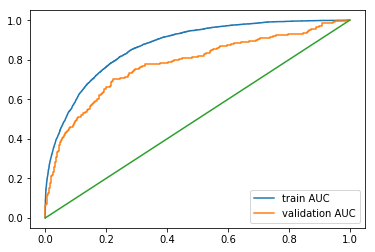

In [5]:
plot_roc_auc(model, X_train, X_val, y_train, y_val)

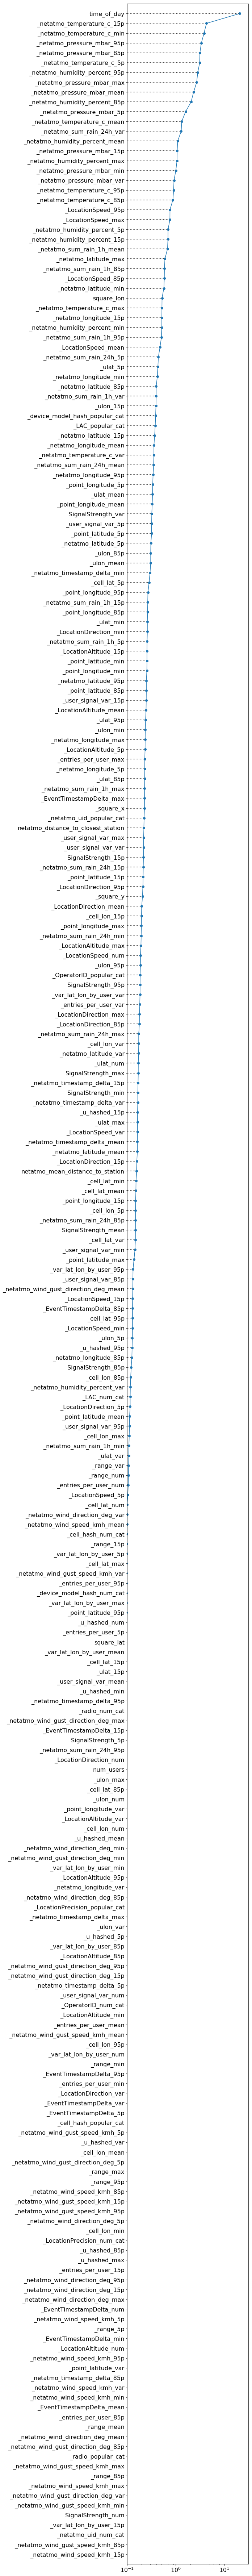

In [6]:
plot_feature_importances(model, X_train)

In [25]:
def stas_xgb(X_train, y_train, X_val, y_val=None):
    ytestxgb = np.zeros(X_val.shape[0])
    bgs = 5
    for bg in tqdm(range(bgs)):
        seed = bg + 1

#         model = CatBoostClassifier(random_seed=seed, thread_count=8) \
#                     .fit(X_train, y_train)
            
        model = CatBoostClassifier(iterations=1069,
                       loss_function='Logloss',
                       learning_rate=0.02,
                       thread_count=8,
                       l2_leaf_reg=10,
                       random_seed=seed) \
            .fit(X_train, y_train)
        
        ypredxgb = model.predict_proba(X_val)[:, 1]
        ytestxgb += ypredxgb
        
        if y_val is not None:
            print(bg, roc_auc_score(y_val, ytestxgb / (bg + 1.)), roc_auc_score(y_val, ypredxgb))
    
    ytestxgb /= bgs
    return ytestxgb    

## Final model and uploading the results

In [26]:
y_pred = stas_xgb(X, y, X_test)

A Jupyter Widget

In [27]:
# model = CatBoostClassifier().fit(X, y)
# y_pred = model.predict_proba(X_test)[:,1]

In [28]:
prediction_for_one_city = test_block_ids.copy()
prediction_for_one_city["prediction"] = y_pred
prediction_for_one_city.to_csv("./intermediate_data/catboost_{}.csv".format(CITY))

prediction_for_one_city.head()

,city_code,sq_x,sq_y,hour_hash,prediction
0,77,7,0,3315759869336143377,0.036474
1,77,2,-7,7848375489058892745,0.085799
2,77,4,6,12866580479863683821,0.034348
3,77,1,0,18032890361362512913,0.096507
4,77,9,18,7188731242448478724,0.218593
